In [15]:
run "/Users/octavia/Dropbox/fire/fire_model/startup.py"

## Read parameter file

In [16]:
# Simulation batch
sim_dir = os.path.join(project_dir, "model_output", "data")
file_dir = os.path.join(sim_dir, "all_sims")
if os.path.isdir(file_dir)  == False:
    os.mkdir(file_dir)
    
sys.path.append(sim_dir)
if "params" in sys.modules:
    del sys.modules["params"]
from params import all_params


In [17]:
all_sims = read_all_sims(file_dir)

In [18]:
res = compute_all_errors(all_sims, sim_dir, recomp = False)

In [19]:
res = pd.read_pickle(sim_dir + "/analytic_errs.pkl")

In [20]:
sim = all_sims.iloc[0]

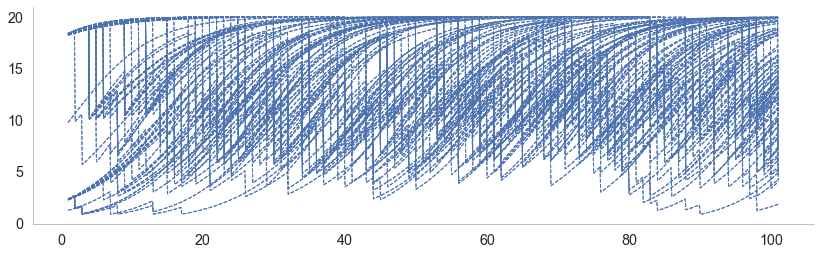

In [21]:
fig, ax = plt.subplots(1, figsize = (14,4) )

for key in all_sims.index[:100]:
    p = all_sims.loc[key][0]
    line_u = ax.plot(p.t_p, 
        p.G_u_list, 'b--', lw = 1, 
        label ="upper canopy")       
    line_u = ax.plot(p.t_p, 
        p.G_u_list, 'b--', lw = 1, 
        label ="upper canopy")          
    

In [22]:
res = pd.DataFrame()
var_list = list(default_params().keys())

for key in all_sims.index:

    p = all_sims.loc[key][0]

    param = pd.Series(vars(p))[var_list]
    
    g_u =  p.G_u/p.k_u
    g_l =  p.G_l/p.k_l
    

    results = pd.Series({"G_u" : p.G_u, 
               "G_l" : p.G_l, 
               "g_l" : g_l, 
               "g_u" : g_u})
    param = param.append(results)

    res = res.append(param, ignore_index = True)
res.index = all_sims.index

In [23]:
res["conifer"] = res["g_l"] < res["g_u"]

In [24]:
np.mean(res["conifer"])

0.5277777777777778

In [90]:
for key in all_sims.index:
    p = all_sims.loc[key][0]

## Check out a high error case

In [39]:
## The errors are all acceptable
x = res["G_l_mean_e"]
cols = ["r_l", "alpha", "severity", "RI", "G_l_mean_a", "G_l_mean_c", "G_l_mean_e" ]
high_error_case = res[x == np.max(x)]
high_error_case[cols]
high_error_case.index[0]
p = all_sims.loc[high_error_case.index[0]][0]

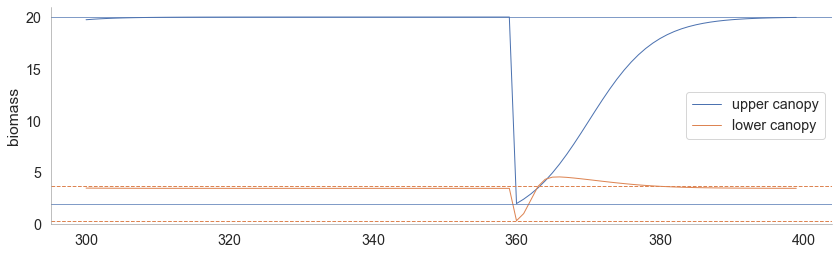

In [40]:
canopy_plot(p, 10)

In [57]:
res

,IC,RI,S,a,alpha,b,beta,chi,dt,dt_p,...,k_u,r,r_l,r_u,seed,severity,severity_type,std_severity,ti,tmax
"alpha-0.02,beta-0.2,RI-70,severity-0.2",0.0,70.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.2,fixed,0.1,300.0,100.0
"alpha-0.02,beta-0.2,RI-60,severity-0.4",0.0,60.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.4,fixed,0.1,300.0,100.0
"alpha-0.02,beta-0.2,RI-30,severity-0.7",0.0,30.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.7,fixed,0.1,300.0,100.0
"alpha-0.02,beta-0.2,RI-20,severity-0.1",0.0,20.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.1,fixed,0.1,300.0,100.0
"alpha-0.02,beta-0.2,RI-30,severity-0.6",0.0,30.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.6,fixed,0.1,300.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"alpha-0.02,beta-0.2,RI-70,severity-0.9",0.0,70.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.9,fixed,0.1,300.0,100.0
"alpha-0.02,beta-0.2,RI-30,severity-0.8",0.0,30.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.8,fixed,0.1,300.0,100.0
"alpha-0.02,beta-0.2,RI-30,severity-0.9",0.0,30.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.9,fixed,0.1,300.0,100.0
"alpha-0.02,beta-0.2,RI-60,severity-0.8",0.0,60.0,0.5,0.01,0.02,0.99,0.2,1.0,0.01,0.1,...,20.0,0.5,1.5,0.25,0.0,0.8,fixed,0.1,300.0,100.0
